Requirements

In [ ]:
import pandas as pd
from transformers import pipeline
import requests
from tqdm import tqdm

#Draw
import matplotlib.pyplot as plt

Google

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# First, make sure to import the auth module from google.colab
from google.colab import auth

# Then, authenticate the user
auth.authenticate_user()

# Now, import the storage module from google.cloud
from google.cloud import storage
import pandas as pd

# Continue with your GCP client creation
client = storage.Client(project='ornate-lens-411311')

# Define your bucket name and file path
bucket_name = 'cine_ethics'
blob_name = 'data/mpst_full_data.csv'  # Path to your file in the bucket

# Create a bucket object and a blob (file) object
bucket = client.get_bucket(bucket_name)
blob = bucket.blob(blob_name)

# Download the file to the Colab environment
downloaded_blob_path = '/tmp/mpst_full_data.csv'
blob.download_to_filename(downloaded_blob_path)

# Now you can use pandas to read the CSV file
df = pd.read_csv(downloaded_blob_path)


In [7]:
#df = pd.read_csv(file_path)
#df.head(5)
#df['plot_synopsis'].head(2)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14828 entries, 0 to 14827
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   imdb_id          14828 non-null  object
 1   title            14828 non-null  object
 2   plot_synopsis    14828 non-null  object
 3   tags             14828 non-null  object
 4   split            14828 non-null  object
 5   synopsis_source  14828 non-null  object
dtypes: object(6)
memory usage: 695.2+ KB


In [ ]:
df.shape

(256, 12)

#1. Geres Distribution


With your dataset structure, there are various visualization ideas you could pursue using Matplotlib. Here are some simple yet insightful visual concepts:

##1. Tag Distribution:

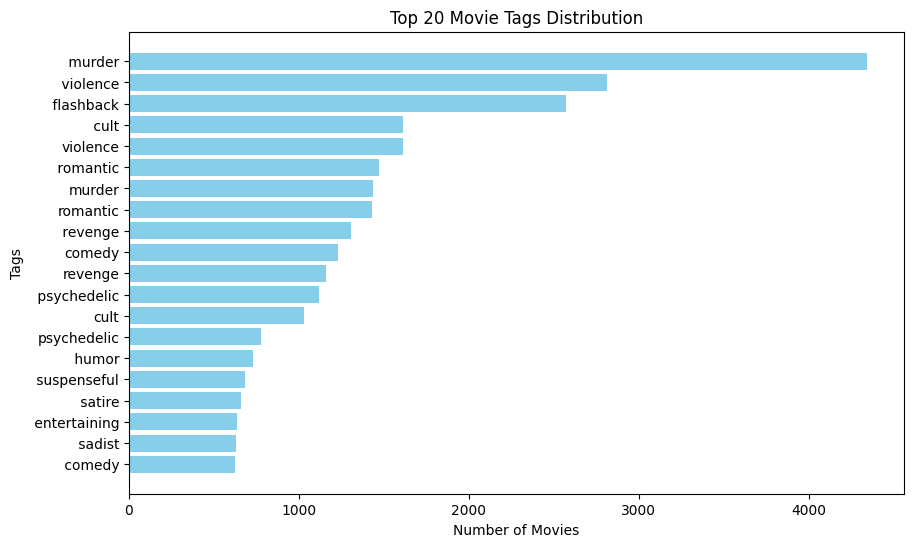

In [9]:
import matplotlib.pyplot as plt
from collections import Counter

# Assuming tags are separated by commas
all_tags = ','.join(df['tags']).split(',')
tag_counts = Counter(all_tags)

# Take the top 20 tags for a clearer visualization
top_tags = dict(tag_counts.most_common(20))

plt.figure(figsize=[10,6])
plt.barh(list(top_tags.keys()), list(top_tags.values()), color='skyblue')
plt.xlabel('Number of Movies')
plt.ylabel('Tags')
plt.title('Top 20 Movie Tags Distribution')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()


NameError: name 'sns' is not defined



```
# This is formatted as code
```

#2. Synopsis Length Distribution:

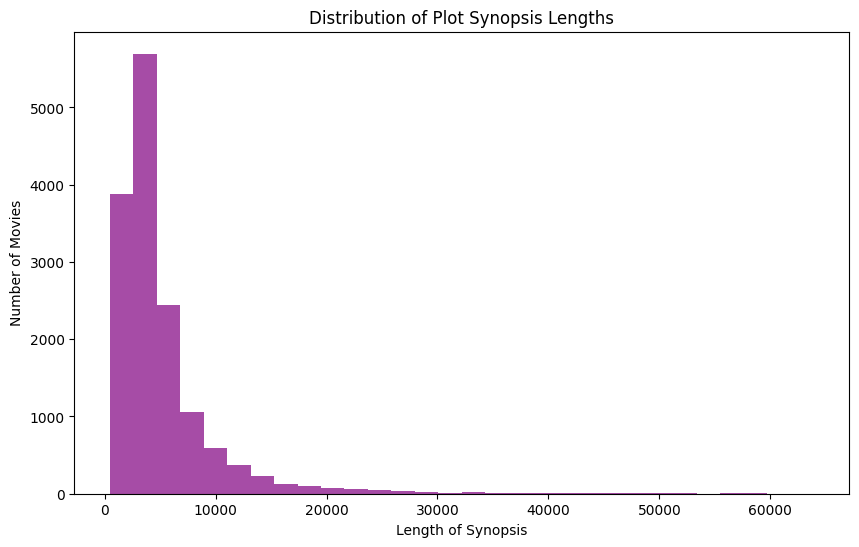

In [12]:
df['synopsis_length'] = df['plot_synopsis'].apply(len)

plt.figure(figsize=[10,6])
plt.hist(df['synopsis_length'], bins=30, color='purple', alpha=0.7)
plt.title('Distribution of Plot Synopsis Lengths')
plt.xlabel('Length of Synopsis')
plt.ylabel('Number of Movies')
plt.show()

#3. Data Source Comparison:

From where came most of the synopsis? check bellow.

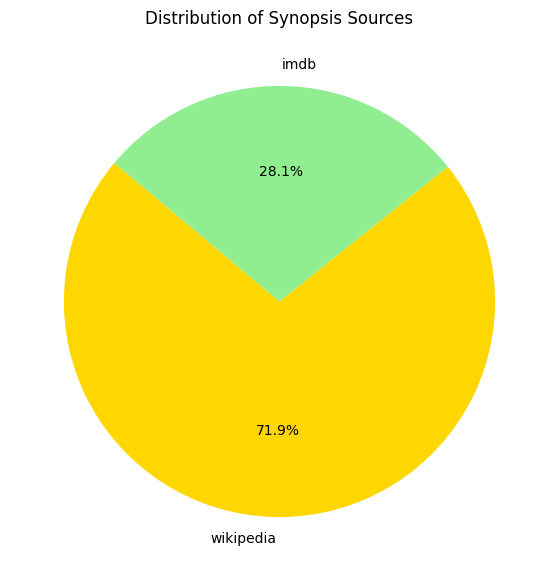

In [13]:
source_counts = df['synopsis_source'].value_counts()

plt.figure(figsize=[7,7])
plt.pie(source_counts, labels=source_counts.index, autopct='%1.1f%%', startangle=140, colors=['gold', 'lightgreen', 'lightcoral', 'lightskyblue'])
plt.title('Distribution of Synopsis Sources')
plt.show()

In [15]:
!pip install seaborn

<ipython-input-17-ac7beba8037e>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Tag', x='Count', data=tags_counted.head(20), palette='coolwarm')  # Using barplot instead


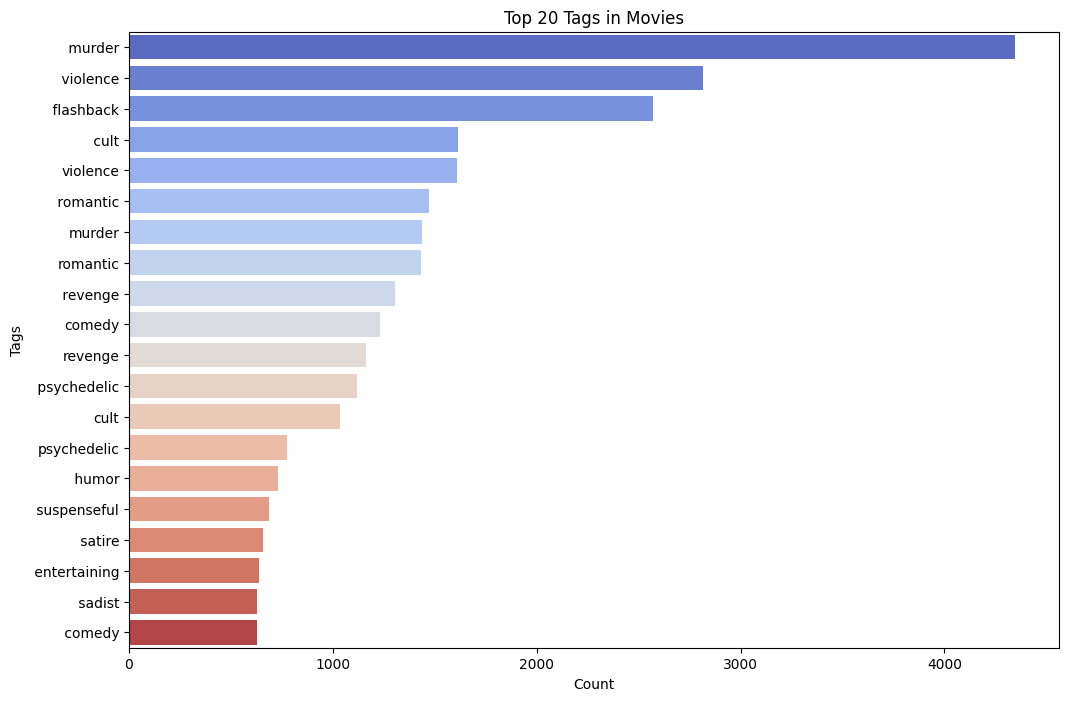

In [17]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Prepare the data
tags_expanded = df['tags'].str.split(',').explode()
tags_counted = tags_expanded.value_counts().reset_index()
tags_counted.columns = ['Tag', 'Count']  # Rename for clarity

# Now, plotting
plt.figure(figsize=(12, 8))
sns.barplot(y='Tag', x='Count', data=tags_counted.head(20), palette='coolwarm')  # Using barplot instead
plt.title('Top 20 Tags in Movies')
plt.xlabel('Count')
plt.ylabel('Tags')
plt.show()


In [ ]:
#Int

#2. Distribution Plot for Synopsis Length:

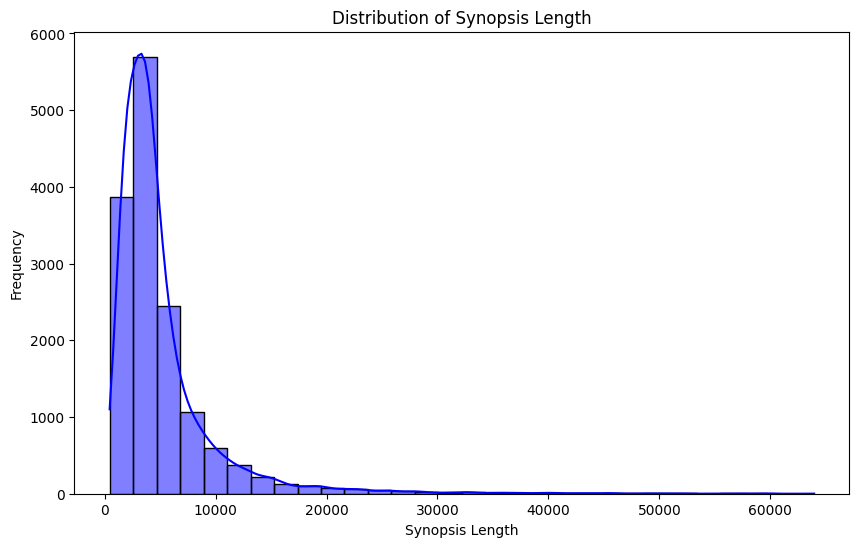

In [18]:
# First, create a new column for synopsis length
df['synopsis_length'] = df['plot_synopsis'].apply(len)

plt.figure(figsize=(10, 6))
sns.histplot(df['synopsis_length'], bins=30, kde=True, color='blue')
plt.title('Distribution of Synopsis Length')
plt.xlabel('Synopsis Length')
plt.ylabel('Frequency')
plt.show()

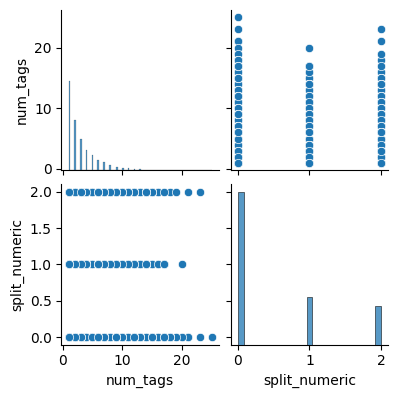

In [20]:


# Let's imagine we convert tags into a count of tags and suppose 'split' was numerical.
# NOTE: This is purely hypothetical and just for demonstration.
# Convert 'tags' count into a numerical column
df['num_tags'] = df['tags'].apply(lambda x: len(x.split(',')))

# Convert 'split' into numerical values just for the sake of visualization
df['split_numeric'] = df['split'].factorize()[0]

# Now you could create a simplified version using Seaborn's pairplot:
# Here 'num_tags' and 'split_numeric' are our "numerical" data columns.
sns.pairplot(df[['num_tags', 'split_numeric']], height=2)
